In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Accuracy: 85.27%


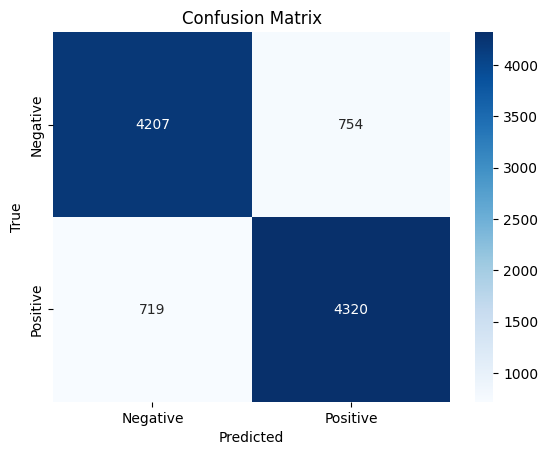

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK stopwords
nltk.download('stopwords')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Project sentiment/IMDB Dataset.csv')  # Change this to your dataset path
df = df[['review', 'sentiment']]  # Keep only relevant columns
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert sentiments to binary values

# Preprocess text data
def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = text.lower()  # Lowercase the text
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)

# Split data into train and test sets
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Model evaluation
y_pred = model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [3]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_model.pkl')

# Save the vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = text.lower()  # Lowercase the text
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])  # Lemmatize words
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package wordnet to /root/nltk_data...
